In [3]:
# Inicialmente importo las librerías neceserias:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [4]:
# Se lee el DataFrame:
df = pd.read_csv('games.csv')

In [5]:
# Se analiza la información del DF:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# Se analiza la información del DF:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Se modifican los titulos de las columnas para que estén en minúsculas:
nuevos_titulos = []
for i in df.columns:
    a = i.lower()
    nuevos_titulos.append(a)
df.columns = nuevos_titulos
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Se revisan las filas con 'TBD':
filas_con_tbd = df[df['user_score'].str.contains('TBD', case=False, na=False)]
df['user_score'].replace('tbd', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se encontró la abreviatura 'TBD' en la columna 'user_score'. Esta columna queremos que sea de tipo flotante por lo que se decidió manejar como valores ausentes. El método replace se utilizó correctamente, como se puede ver al llamar a la función info(), los valores no nulos en la columna 'user_score' disminuyeron.

In [9]:
# Se modifican los tipos de columnas necesarios:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Se modificaron las columnas 'year_of_release' y 'user_score' en valores enteros y flotantes respectivamente para que sean más consistentes con la información que transmiten y se puedan realizar operaciones donde sea necesario.

In [10]:
# Se revisa si hay filas duplicadas:
df.duplicated().sum()

np.int64(0)

No hay filas duplicadas

In [11]:
# Se revisan los valores ausentes:
df.dropna(subset=['name'], inplace=True)
df['name'].isna().sum()

np.int64(0)

Se encontraron valores ausentes en los nombres de los juegos, por lo que se decidió eliminar esas filas al no ser representativas. En el resto de las columnas se encontraron datos ausentes, pero no se considera que se deban modificar porque se supone que simplemente falta la información y no se pueden reemplazar con valores estadísticos.

In [12]:
# Calcula las ventas totales:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [13]:
# Cuántos juegos fueron lanzados en diferentes años?
juegos_por_año = df.groupby('year_of_release')['name'].count()
print(juegos_por_año)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


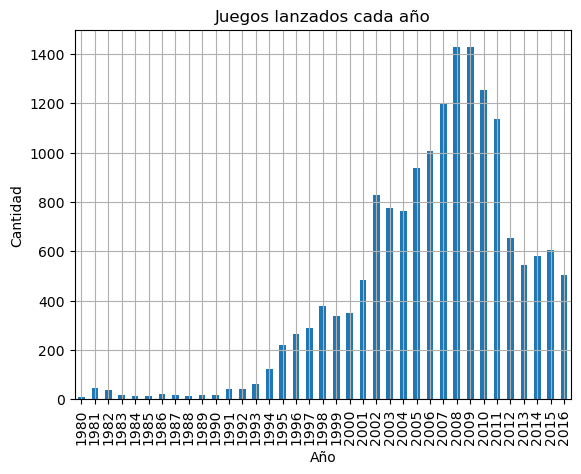

In [14]:
juegos_por_año.plot(title='Juegos lanzados cada año', ylabel='Cantidad', xlabel='Año', kind='bar', rot=90, grid=True)
plt.show()

Como se puede observar en la gráfica, la cantidad de juegos lanzados ha venido aumentando desde los años 90, llegando a su pico a finales de los 2000, y volvió a disminuir considerablemente desde el 2012.

In [15]:
# Elige las plataformas con las mayores ventas totales
top_plataformas = df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(5).reset_index()
top_plataformas.drop('index', axis=1, inplace=True)
top_plataformas

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


In [16]:
# Se extraen las plataformas más vendidas en el df original
df_top_plataformas = df[df['platform'].isin(top_plataformas['platform'])][['platform','year_of_release','total_sales']].reset_index()
df_top_plataformas.drop('index', axis=1, inplace=True)
df_top_plataformas.head()

,platform,year_of_release,total_sales
0,Wii,2006,82.54
1,Wii,2008,35.52
2,Wii,2009,32.77
3,DS,2006,29.80
4,Wii,2006,28.91


In [17]:
# Se agrupan las ventas anuales de las plataformas más vendidas
ventas_anuales_plataforma = df_top_plataformas.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
print(ventas_anuales_plataforma)

   platform  year_of_release  total_sales
0        DS             1985         0.02
1        DS             2004        17.27
2        DS             2005       130.14
3        DS             2006       119.81
4        DS             2007       146.94
5        DS             2008       145.31
6        DS             2009       119.54
7        DS             2010        85.02
8        DS             2011        26.18
9        DS             2012        11.01
10       DS             2013         1.54
11      PS2             2000        39.17
12      PS2             2001       166.43
13      PS2             2002       205.38
14      PS2             2003       184.31
15      PS2             2004       211.81
16      PS2             2005       160.66
17      PS2             2006       103.42
18      PS2             2007        75.99
19      PS2             2008        53.90
20      PS2             2009        26.40
21      PS2             2010         5.64
22      PS2             2011      

Al agrupar las ventas de estas consolas por año se encuentra un dato del dataframe que no tiene sentido y puede afectar al análisis posterior. El juego 'Strongest Tokyo University Shogi DS' tiene una fecha de lanzamiento erronea, puesto que dice que se lanzó en 1985 pero la consola Nintendo DS se lanzó en el año 2004. Al ser un juego de esta consola, si se toman en cuenta las ventas pero no el año de lanzamiento proporcionado.

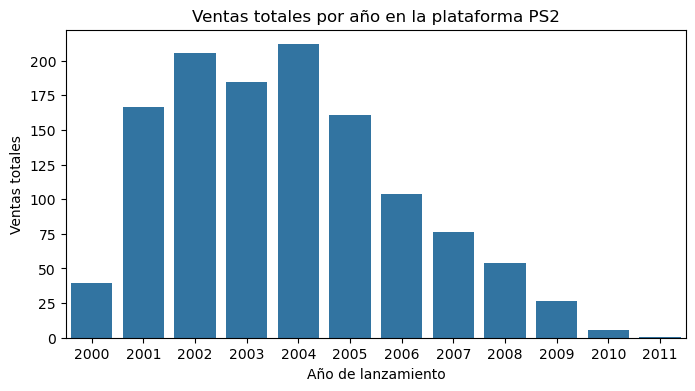

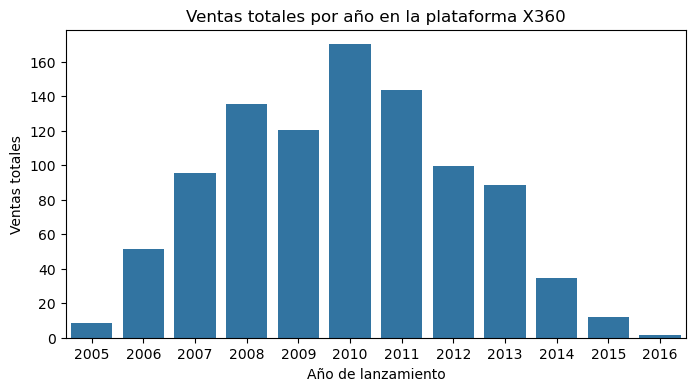

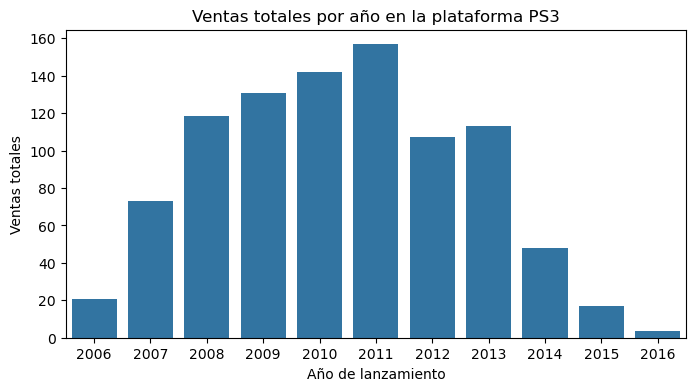

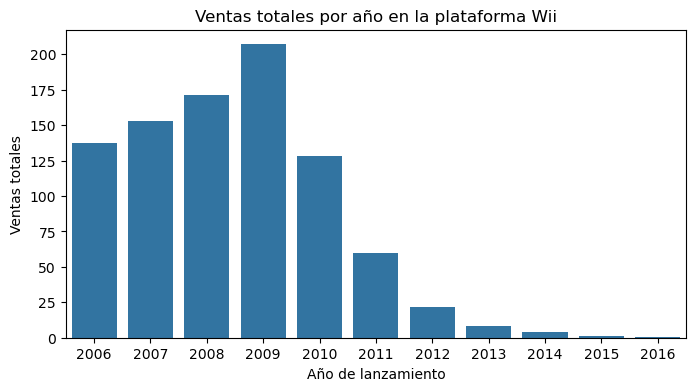

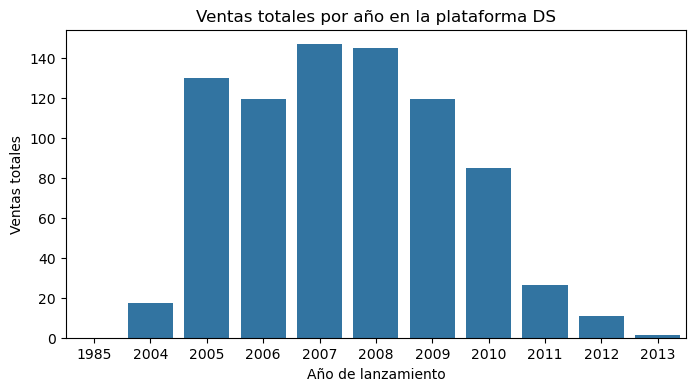

In [18]:
# Se grafican distribuciones de las ventas anuales de cada plataforma
for i in top_plataformas['platform']:
    plt.figure(figsize=(8, 4))
    sns.barplot(data = ventas_anuales_plataforma[ventas_anuales_plataforma['platform'] == i], x='year_of_release', y='total_sales')
    plt.title(f'Ventas totales por año en la plataforma {i}')
    plt.ylabel('Ventas totales')
    plt.xlabel('Año de lanzamiento')
    plt.show()

La distribución de ventas de todas las consolas es consistente en que son mayores al comienzo y a la mitad del ciclo de vida de las consolas. Así mismo, las ventas decaen a medida que se acerca el final de la vida de la consola.

In [19]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas
df_ventas_anuales_plataforma = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
ultimo_año_con_ventas = df_ventas_anuales_plataforma.groupby('platform')['year_of_release'].max().reset_index()
primer_año_con_ventas = df_ventas_anuales_plataforma.groupby('platform')['year_of_release'].min().reset_index()

tiempo_de_vida_plataformas = pd.merge(primer_año_con_ventas, ultimo_año_con_ventas, on='platform')
tiempo_de_vida_plataformas.columns = ['platform', 'first_year_of_sales', 'last_year_of_sales']
tiempo_de_vida_plataformas.loc[tiempo_de_vida_plataformas['platform'] == 'DS', 'first_year_of_sales'] = 2004

tiempo_de_vida_plataformas['lifetime'] = tiempo_de_vida_plataformas['last_year_of_sales'] - tiempo_de_vida_plataformas['first_year_of_sales']
tiempo_de_vida_plataformas = tiempo_de_vida_plataformas.sort_values(by='lifetime', ascending=False).reset_index()
tiempo_de_vida_plataformas.drop('index', axis=1, inplace=True)
print(tiempo_de_vida_plataformas[tiempo_de_vida_plataformas['last_year_of_sales'] != 2016].head())

  platform  first_year_of_sales  last_year_of_sales  lifetime
1       GB                 1988                2001        13
2      NES                 1983                1994        11
3      PSP                 2004                2015        11
5      PS2                 2000                2011        11
6       DC                 1998                2008        10


La GB, NES, PSP, PS2 Y DC son las 5 consolas populares que duraron más en el mercado pero ya no tienen ventas.

In [20]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
nuevas_plataformas = tiempo_de_vida_plataformas[(tiempo_de_vida_plataformas['first_year_of_sales'] >= 2000) & (tiempo_de_vida_plataformas['last_year_of_sales'] != 2016)]
antiguas_plataformas = tiempo_de_vida_plataformas[(tiempo_de_vida_plataformas['first_year_of_sales'] < 2000) & (tiempo_de_vida_plataformas['platform'] != 'PC')]

print(nuevas_plataformas['lifetime'].mean())
print(antiguas_plataformas['lifetime'].mean())

8.666666666666666
5.1875


Se consideraron plataformas antiguas las lanzadas antes del año 2000. No se considera al PC debido a que está presente en todo el periodo analizado puesto que no ha tenido ningún cambio de consola (no ha desaparecido). También, se quitan del análisis las consolas que tengan ventas en el 2016, porque es posible que no hayan terminado su ciclo de vida y generen un sesgo en los datos.
En promedio, las consolas modernas tienen un ciclo de vida mayor a las antiguas, ya que duran en el mercado aproximadamente 8 años en el primer caso y 5 años en el segundo.

*Determina para qué período debes tomar datos. Los datos deberían permitirte construir un modelo para 2017.*

Para esto, se propone tomar datos desde el año 2010 hasta el 2016, con el fin de tener una noción más realista del estado del mercado del 2017.

In [21]:
# Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
modelo_actual = df[df['year_of_release'] >= 2010]
modelo_actual = modelo_actual.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
modelo_actual = modelo_actual[~(modelo_actual['platform'].isin(nuevas_plataformas['platform']))]
modelo_actual

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
10,PC,2010,24.28
11,PC,2011,35.03
12,PC,2012,23.22
13,PC,2013,12.38


Se crea un nuevo dataframe con los lanzamientos hechos desde el 2010. Se eliminan las consolas cuyo tiempo de vida ya terminó; esto incluye a la PSP, PS2 y DS como consolas no rentables. 

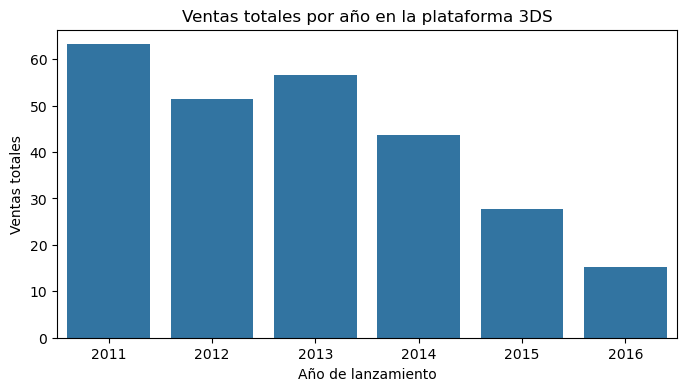

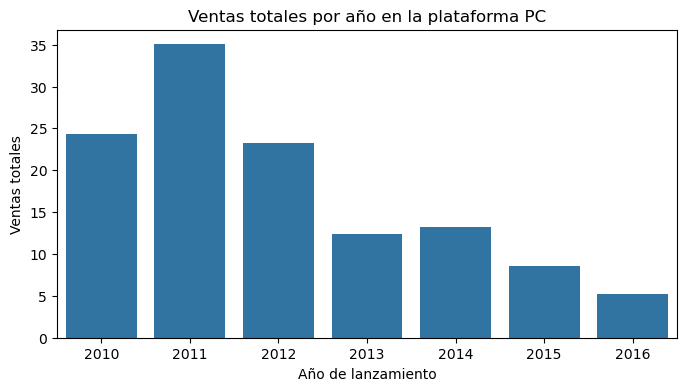

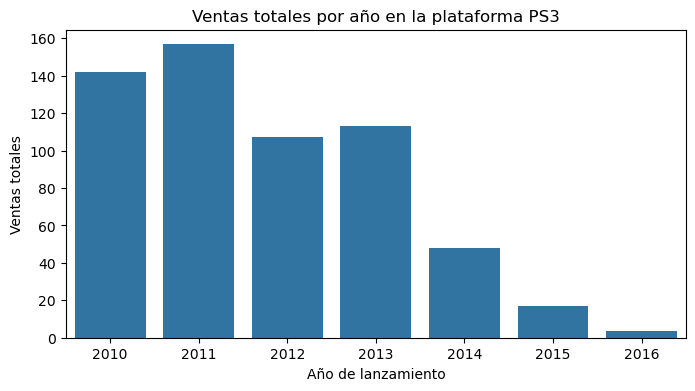

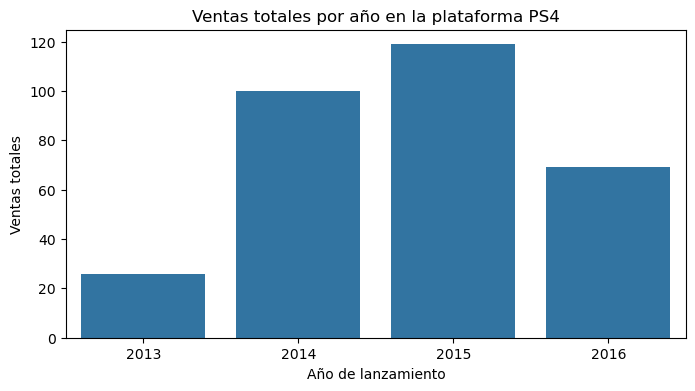

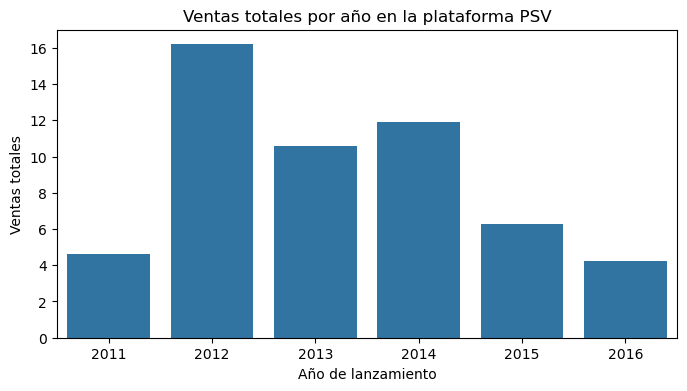

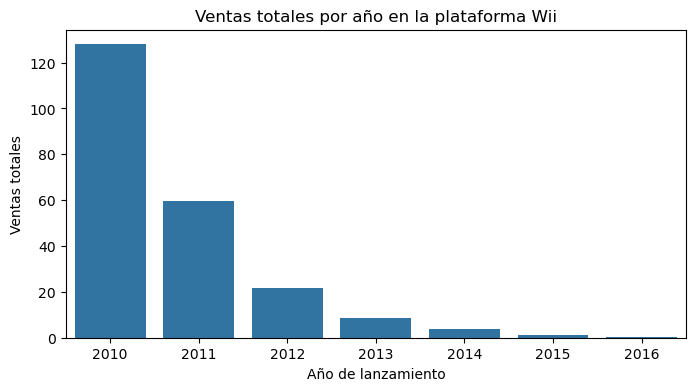

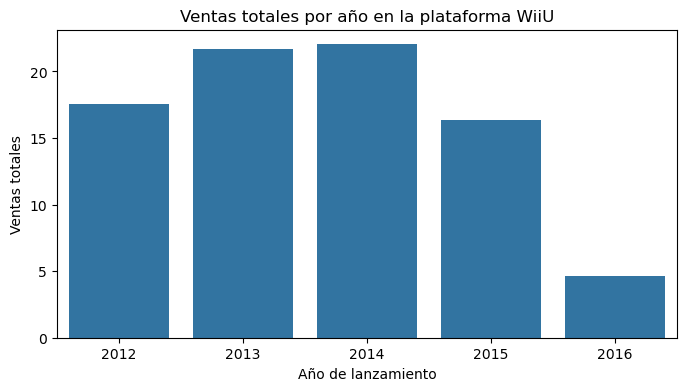

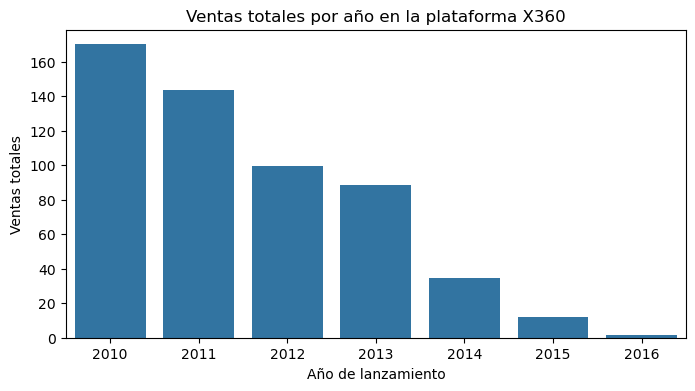

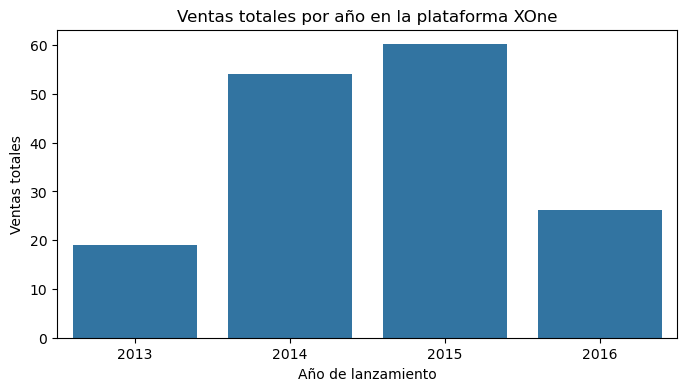

In [22]:
# ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
for i in modelo_actual['platform'].unique():
    plt.figure(figsize=(8, 4))
    sns.barplot(data = modelo_actual[modelo_actual['platform'] == i], x='year_of_release', y='total_sales')
    plt.title(f'Ventas totales por año en la plataforma {i}')
    plt.ylabel('Ventas totales')
    plt.xlabel('Año de lanzamiento')
    plt.show()

En general, las ventas de todas las consolas ha disminuido en comparación con el año anterior. Sin embargo, las ventas de algunas consolas siguen siendo considerables como para invertir en juegos para las mismas. Así pues, no conviene invertir en X360, Wii o PS3. Por otro lado, sí se puede invertir en XOne, WiiU, PSV, PS4, 3DS y PC. 

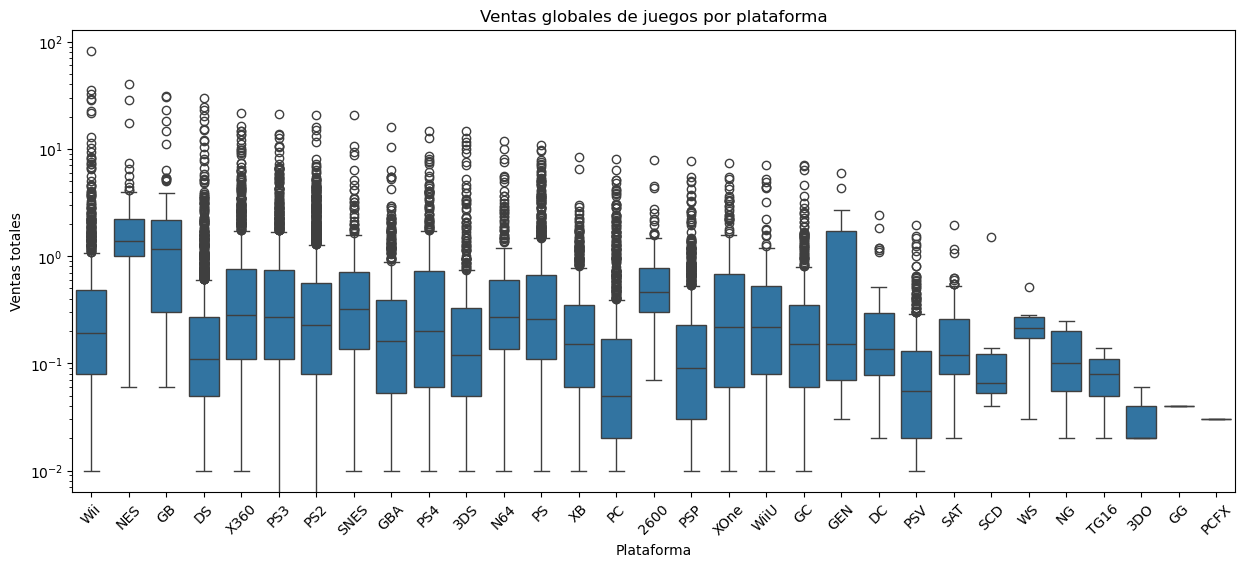

In [23]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
# ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
plt.figure(figsize=(15, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Ventas globales de juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

Las ventas promedio de los juegos no varían mucho al comparar todas las consolas. Como se había visto anteriormente, las consolas más antiguas sí tienen muchas menos ventas promedio, el resto muestran valores similares. 
Aún así, el promedio de los juegos de la NES y la GB son un poco superiores al resto. Además, la mayoría de las consolas tiene varios juegos destacados con ventas superiores, mostrados en el diagrama como valores atípicos. Por ejemplo, el juego 'Wii sports' tiene ventas supueriores a los 80 millones de dolares. 

In [24]:
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
relacion_ventas_reseñas_pc = df[df['platform'] == 'PC'][['platform','critic_score','user_score','total_sales']]
relacion_ventas_reseñas_pc.head()

,platform,critic_score,user_score,total_sales
85,PC,86.0,7.6,8.01
138,PC,93.0,7.3,6.29
192,PC,88.0,4.0,5.14
195,PC,NaN,NaN,5.11
218,PC,93.0,8.2,4.83


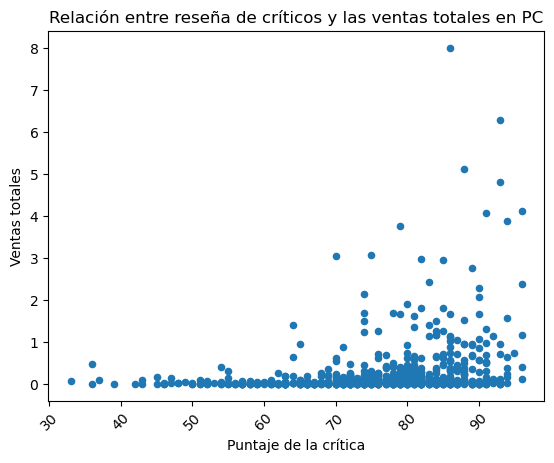

In [25]:
# Relación critic_score vs total_sales
relacion_ventas_reseñas_pc.plot(kind='scatter', x='critic_score', y='total_sales')
plt.title('Relación entre reseña de críticos y las ventas totales en PC')
plt.xlabel('Puntaje de la crítica')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.show()

In [26]:
print(relacion_ventas_reseñas_pc['critic_score'].corr(relacion_ventas_reseñas_pc['total_sales']))

0.2568867378948215


Como se puede observar tanto en el gráfico, como en la correlación de valores, no existe una relación directa entre las reseñas de los críticos y las ventas totales de los juegos en PC.

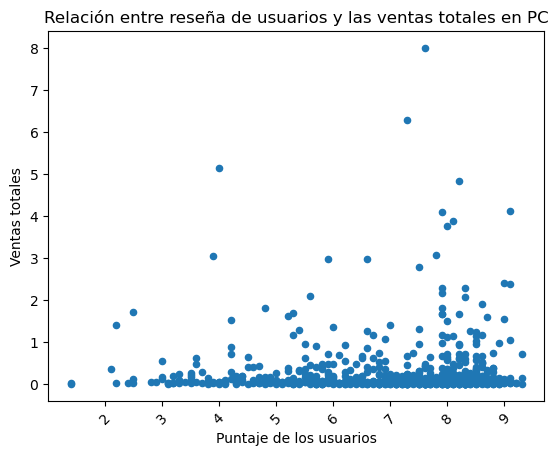

In [27]:
# Relación user_score vs total_sales
relacion_ventas_reseñas_pc.plot(kind='scatter', x='user_score', y='total_sales')
plt.title('Relación entre reseña de usuarios y las ventas totales en PC')
plt.xlabel('Puntaje de los usuarios')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.show()

In [28]:
print(relacion_ventas_reseñas_pc['user_score'].corr(relacion_ventas_reseñas_pc['total_sales']))

0.010475684621486417


Como se puede observar tanto en el gráfico, como en la correlación de valores, no existe una relación directa entre las reseñas de los usuarios y las ventas totales de los juegos en PC.

In [29]:
# Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
# Se agrupan los juegos lanzados en PC y sus ventas totales en esa plataforma:
juegos_de_pc = df[df['platform'] == 'PC'].groupby('name')['total_sales'].sum().reset_index()
juegos_de_pc

,name,total_sales
0,007: Quantum of Solace,0.02
1,15 Days,0.01
2,1701 A.D.,0.29
3,18 Wheels of Steel: Extreme Trucker,0.02
4,18 Wheels of Steel: Extreme Trucker 2,0.11
...,...,...
968,Zoo Tycoon 2,0.06
969,Zoo Tycoon 2: Ultimate Collection,0.26
970,Zoo Tycoon: Complete Collection,0.06
971,[Prototype 2],0.11


In [30]:
# Se agrupan los juegos que además de lanzarse en PC, salieron para otras plataformas:
juegos_de_pc_en_otras_plataformas = df[(df['name'].isin(juegos_de_pc['name'])) & (df['platform'] != 'PC')].groupby('name')['total_sales'].sum().reset_index()
juegos_de_pc_en_otras_plataformas

,name,total_sales
0,007: Quantum of Solace,3.84
1,Agatha Christie: The ABC Murders,0.10
2,Air Conflicts: Secret Wars,0.28
3,Alan Wake,1.34
4,Alice: Madness Returns,1.07
...,...,...
505,XCOM 2,0.18
506,XCOM: Enemy Unknown,1.19
507,You Don't Know Jack,1.03
508,[Prototype 2],1.53


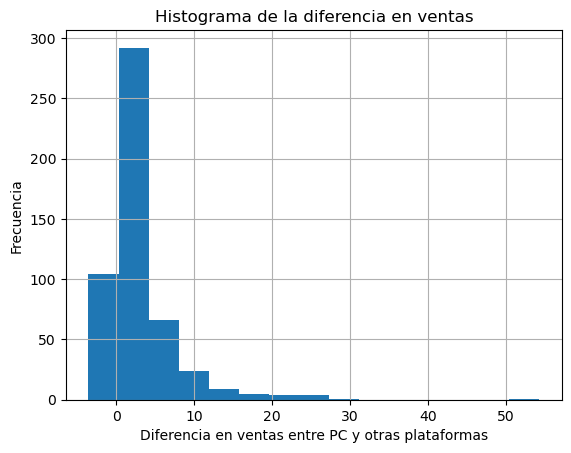

In [31]:
# Se fusionan ambos df para comparar las ventas totales de los juegos en cada plataforma:
comparacion_ventas_juegos_de_pc_en_otros = juegos_de_pc_en_otras_plataformas.merge(juegos_de_pc, on='name', how='left')
comparacion_ventas_juegos_de_pc_en_otros.columns = ['name', 'total_sales_other_platforms', 'total_sales_pc']
comparacion_ventas_juegos_de_pc_en_otros['diference_on_sales'] = comparacion_ventas_juegos_de_pc_en_otros['total_sales_other_platforms'] - comparacion_ventas_juegos_de_pc_en_otros['total_sales_pc']
comparacion_ventas_juegos_de_pc_en_otros['diference_on_sales'].hist(bins=15)
plt.xlabel('Diferencia en ventas entre PC y otras plataformas')
plt.ylabel('Frecuencia')
plt.title('Histograma de la diferencia en ventas')
plt.show()

En el histograma se puede ver que en la mayoría de las veces, las ventas totales de los videojuegos en otras plataformas diferentes a PC son mayores. 

In [32]:
# ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
ventas_por_genero = df.groupby('genre')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False).reset_index()
ventas_por_genero.drop('index', axis=1, inplace=True)
ventas_por_genero

,genre,total_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Los generos más rentables son action, sports, shooter, role-playing y platform, lo que indica que suelen ser los más populares y demandados por los usuarios. Por otro lado, puzzle, adventure, strategy son los menos rentables. Esto puede deberse a que tienen audiencias más específicas, menor inversión en marketing, o simplemente menor interés general.

In [33]:
# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
comparacion_plataformas = df[df['platform'].isin(top_plataformas['platform'])].groupby('platform',)[['na_sales','eu_sales','jp_sales']].sum().reset_index()
comparacion_plataformas

,platform,na_sales,eu_sales,jp_sales
0,DS,382.40,188.89,175.57
1,PS2,583.84,339.29,139.20
2,PS3,393.49,330.29,80.19
3,Wii,496.90,262.21,69.33
4,X360,602.47,270.76,12.43


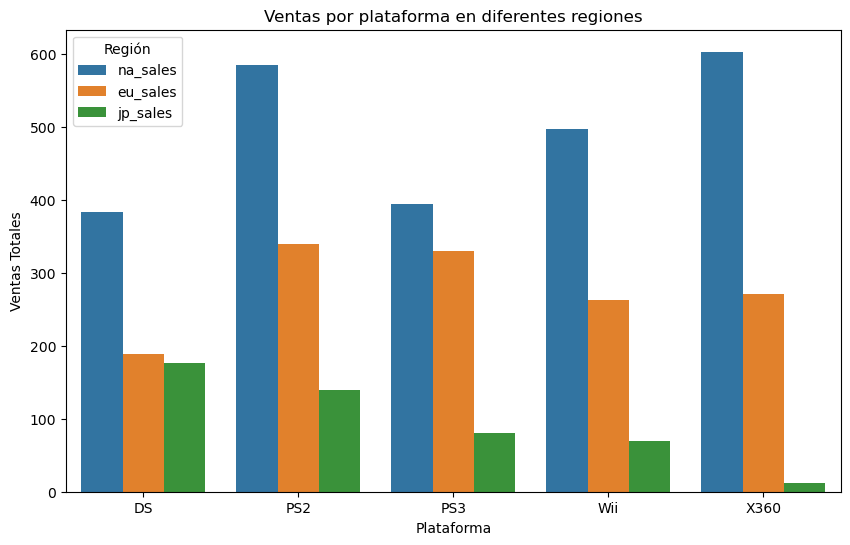

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparacion_plataformas.melt(id_vars='platform', value_vars=['na_sales','eu_sales','jp_sales']), x='platform', y='value', hue='variable')
plt.title('Ventas por plataforma en diferentes regiones')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.legend(title='Región')
plt.show()

Como se puede ver en el diagrama de barras, en norteamérica hay mayores ventas en los juegos para todas las plataformas principales, seguido de europa y japón de último. 

In [35]:
# Los cinco géneros principales. Explica la diferencia.
comparacion_generos = df[df['genre'].isin(ventas_por_genero['genre'].head())].groupby('genre',)[['na_sales','eu_sales','jp_sales']].sum().reset_index()
comparacion_generos

,genre,na_sales,eu_sales,jp_sales
0,Action,879.01,519.13,161.43
1,Platform,445.50,200.35,130.83
2,Role-Playing,330.81,188.71,355.41
3,Shooter,592.24,317.34,38.76
4,Sports,684.43,376.79,135.54


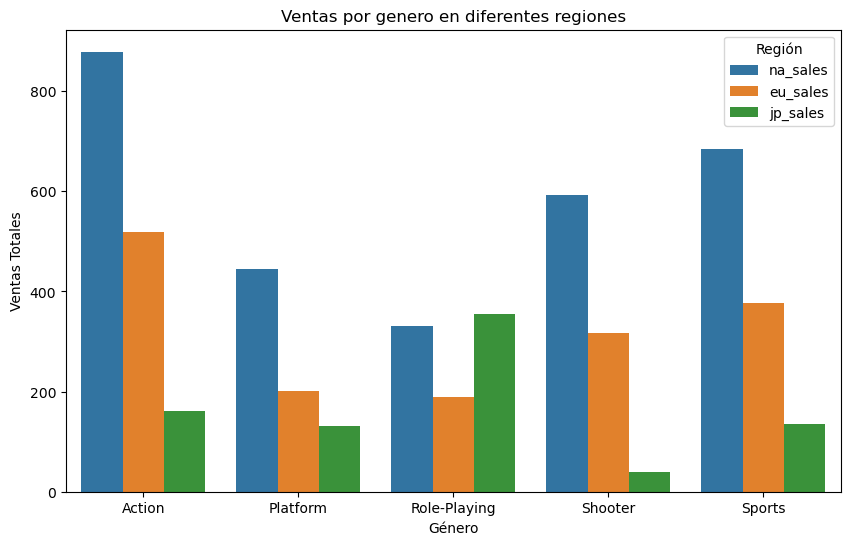

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparacion_generos.melt(id_vars='genre', value_vars=['na_sales','eu_sales','jp_sales']), x='genre', y='value', hue='variable')
plt.title('Ventas por genero en diferentes regiones')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.legend(title='Región')
plt.show()

Como se puede apreciar en el gráfico, en casi todos los generos principales hay mayores ventas en norteamérica, seguido de europa y japón. Sin embargo, el género de juegos de rol tiene mejores ventas en japón con respecto a las demás regiones. Por lo que se asume que es un genero muy popular en esa zona.

In [37]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
comparacion_esrb = df.groupby('rating',)[['na_sales','eu_sales','jp_sales']].sum().reset_index()
comparacion_esrb

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1292.99,710.25,198.11
2,E10+,353.32,188.52,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,748.48,483.97,64.24
6,RP,0.00,0.08,0.00
7,T,759.75,427.03,151.40


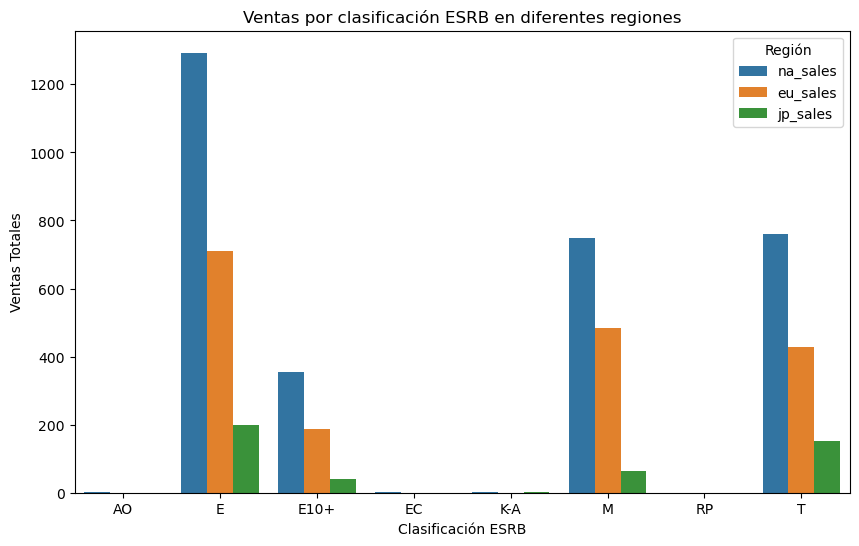

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=comparacion_esrb.melt(id_vars='rating', value_vars=['na_sales','eu_sales','jp_sales']), x='rating', y='value', hue='variable')
plt.title('Ventas por clasificación ESRB en diferentes regiones')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales')
plt.legend(title='Región')
plt.show()

Las clasificaciones con más ventas son E, E10+, M y T. En todos los casos se venden más juegos en norteamérica, después en europa y por último en japón. También, se puede apreciar que los juegos más vendidos son de clasificación E puesto que no están hechos para un nicho específico.

In [39]:
# Prueba las siguientes hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
clasificaciones_usuarios_xone = df[df['platform'] == 'XOne']['user_score'].dropna()
clasificaciones_usuarios_pc = df[df['platform'] == 'PC']['user_score'].dropna()

# Desviación estándar y varianza:
print(f"Desviación estandar XOne: {np.std(clasificaciones_usuarios_xone)} Varianza: {np.var(clasificaciones_usuarios_xone)}")
print(f"Desviación estandar PC: {np.std(clasificaciones_usuarios_pc)} Varianza: {np.var(clasificaciones_usuarios_pc)}")

Desviación estandar XOne: 1.377141546212499 Varianza: 1.8965188383045526
Desviación estandar PC: 1.5289693123266956 Varianza: 2.3377471580367684


In [40]:
# Prueba t:
resultado = st.ttest_ind(clasificaciones_usuarios_xone, clasificaciones_usuarios_pc, equal_var=False)
print(f"p-valor: {resultado.pvalue}")
if resultado.pvalue < 0.05:
    print("Las clasificaciones de los usuarios en XOne y PC difieren significativamente.")
else:
    print("No hay diferencia estadísticamente significativa en las clasificaciones entre XOne y PC.")

p-valor: 4.935072360183574e-06
Las clasificaciones de los usuarios en XOne y PC difieren significativamente.


Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
Alpha: 0.05
Se utiliza un parámetro alpha del 0.05 y la prueba t muestra un valor mucho más pequeño, por lo que las clasificaciones de los usuarios en XOne y PC difieren significativamente. Se eligió este valor de alpha para tener un nivel de confianza bastante alto (95%).

In [41]:
# Prueba las siguientes hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
clasificaciones_usuarios_accion = df[df['genre'] == 'Action']['user_score'].dropna()
clasificaciones_usuarios_deportes = df[df['genre'] == 'Sports']['user_score'].dropna()

# Desviación estándar y varianza:
print(f"Desviación estandar Acción: {np.std(clasificaciones_usuarios_accion)} Varianza: {np.var(clasificaciones_usuarios_accion)}")
print(f"Desviación estandar Deportes: {np.std(clasificaciones_usuarios_deportes)} Varianza: {np.var(clasificaciones_usuarios_deportes)}")

Desviación estandar Acción: 1.4250040890561086 Varianza: 2.03063665382663
Desviación estandar Deportes: 1.6106398328543279 Varianza: 2.594160671177017


In [42]:
# Prueba t:
resultado = st.ttest_ind(clasificaciones_usuarios_accion, clasificaciones_usuarios_deportes, equal_var=False)
print(f"p-valor: {resultado.pvalue}")
if resultado.pvalue < 0.05:
    print("Las clasificaciones de los usuarios en los generos de acción y deportes difieren significativamente.")
else:
    print("No hay diferencia estadísticamente significativa en las clasificaciones entre los generos de acción y deportes.")

p-valor: 0.11483818791498288
No hay diferencia estadísticamente significativa en las clasificaciones entre los generos de acción y deportes.


Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Alpha: 0.05
Se utiliza un parámetro alpha del 0.05 y la prueba t muestra un valor más grande, por lo que no hay diferencia estadísticamente significativa en las clasificaciones entre los generos de acción y deportes. Se eligió este valor de alpha para tener un nivel de confianza bastante alto (95%).

**CONLUSIONES**

Este proyecto permitió analizar en profundidad diversos aspectos del mercado de videojuegos, revelando que las plataformas más rentables en ventas, como PS2, X360, PS3, Wii y DS, han mostrado una tendencia decreciente en sus ventas desde 2010, aunque todavía mantienen un potencial notable. La comparación de ventas por juegos en diferentes plataformas indica que muchos títulos se venden significativamente más en una plataforma que en otras, destacando la importancia de identificar qué títulos y plataformas son más rentables en cada región. El análisis de géneros mostró que los más populares y con mayores ventas son Acción, Deportes, Shooter y Rol, con una fuerte preferencia en Norteamérica y Europa, mientras que en Japón predomina el género de Rol. Además, las clasificaciones ESRB como E, E10+ y T son las que generan mayor volumen de ventas en todas las regiones. Los análisis estadísticos confirmaron que las calificaciones de los usuarios en plataformas como Xbox One y PC difieren significativamente, y que los géneros de Acción y Deportes no presentan diferencias estadísticamente significativas en cuanto a las calificaciones de los usuarios. En conjunto, los hallazgos permiten obtener una visión integral del mercado, ayudando a la tienda a planificar campañas específicas, identificar plataformas y géneros potencialmente rentables, y comprender mejor sus tendencias en un escenario de cambio constante.